<a href="https://www.kaggle.com/code/ellecoding/eda-book-trends-in-india-2024?scriptVersionId=171539623" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Genre_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv
/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Sub_Genre_df.csv
/kaggle/input/author-nationalities-amazonbookdf/author_nationalities.csv


# EDA: Book Trends in India (2024)
Amazon has over 100 million registered customers in India. In this project, I will do a quick EDA to explore books trends in India as of March, 2024. We'll dig into top ratings, genres, authors, and more. Lastly, visualize the data through infographics and an interactive Tableau dashboard. Let's get started!

In [3]:
# Load dataset
file_path = '/kaggle/input/amazon-books-dataset/Amazon_Books_Scraping/Books_df.csv'
books_df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
books_df.head()

,Unnamed: 0,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated,URLs
0,0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0,https://www.amazon.in/Complete-Novels-Sherlock...
1,1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0,https://www.amazon.in/Black-Holes-Lectures-Ste...
2,2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0,https://www.amazon.in/Kite-Runner-Khaled-Hosse...
3,3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0,https://www.amazon.in/Greenlights-Raucous-stor...
4,4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0,https://www.amazon.in/Science-Storytelling-Wil...


In [4]:
print(books_df.describe())

       Unnamed: 0       Rating  No. of People rated
count   7928.0000  7928.000000          7928.000000
mean    3963.5000     4.260797          6479.312941
std     2288.7608     0.910659         22082.884343
min        0.0000     0.000000             0.000000
25%     1981.7500     4.300000            63.000000
50%     3963.5000     4.500000           499.000000
75%     5945.2500     4.600000          2905.250000
max     7927.0000     5.000000        500119.000000


In [5]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7928 entries, 0 to 7927
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           7928 non-null   int64  
 1   Title                7928 non-null   object 
 2   Author               7907 non-null   object 
 3   Main Genre           7928 non-null   object 
 4   Sub Genre            7928 non-null   object 
 5   Type                 7928 non-null   object 
 6   Price                7928 non-null   object 
 7   Rating               7928 non-null   float64
 8   No. of People rated  7928 non-null   float64
 9   URLs                 7928 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 619.5+ KB
None


## Clean Dataset
Change currency, drop duplicates, clean NaNs... you know the drill!

In [6]:
# Remove the 'Unnamed: 0' column
books_df.drop(columns=['Unnamed: 0','URLs'], inplace=True)


# Check changes
books_df.head()

,Title,Author,Main Genre,Sub Genre,Type,Price,Rating,No. of People rated
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹169.00,4.4,19923.0
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹99.00,4.5,7686.0
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,₹175.75,4.6,50016.0
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹389.00,4.6,32040.0
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,₹348.16,4.5,1707.0


In [7]:
# Define the exchange rate (1 INR = 0.014 USD)
exchange_rate = 0.014

# Function to convert price from INR to USD
def convert_to_usd(price_inr):
    # Remove the currency symbol and convert to float
    price_numeric = float(price_inr.replace('₹', '').replace(',', ''))
    # Convert to USD using the exchange rate
    price_usd = price_numeric * exchange_rate
    return price_usd

# Apply the conversion function to the "Price" column and create a new column for converted prices
books_df['Price_USD'] = books_df['Price'].apply(convert_to_usd)

# Display the updated DataFrame with converted prices
print(books_df[['Title', 'Price', 'Price_USD']].head())


                                               Title    Price  Price_USD
0              The Complete Novel of Sherlock Holmes  ₹169.00    2.36600
1  Black Holes (L) : The Reith Lectures [Paperbac...   ₹99.00    1.38600
2                                    The Kite Runner  ₹175.75    2.46050
3  Greenlights: Raucous stories and outlaw wisdom...  ₹389.00    5.44600
4  The Science of Storytelling: Why Stories Make ...  ₹348.16    4.87424


In [8]:
# Remove the Price column
books_df.drop(columns=['Price'], inplace=True)

# Check changes
books_df.head()

,Title,Author,Main Genre,Sub Genre,Type,Rating,No. of People rated,Price_USD
0,The Complete Novel of Sherlock Holmes,Arthur Conan Doyle,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.4,19923.0,2.36600
1,Black Holes (L) : The Reith Lectures [Paperbac...,Stephen Hawking,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.5,7686.0,1.38600
2,The Kite Runner,Khaled Hosseini,"Arts, Film & Photography",Cinema & Broadcast,Kindle Edition,4.6,50016.0,2.46050
3,Greenlights: Raucous stories and outlaw wisdom...,Matthew McConaughey,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.6,32040.0,5.44600
4,The Science of Storytelling: Why Stories Make ...,Will Storr,"Arts, Film & Photography",Cinema & Broadcast,Paperback,4.5,1707.0,4.87424


In [9]:
# Round the Price_USD column to two decimal places
books_df['Price_USD'] = books_df['Price_USD'].round(2)

# Display the updated DataFrame with rounded prices
print(books_df[['Title', 'Price_USD']].head())

                                               Title  Price_USD
0              The Complete Novel of Sherlock Holmes       2.37
1  Black Holes (L) : The Reith Lectures [Paperbac...       1.39
2                                    The Kite Runner       2.46
3  Greenlights: Raucous stories and outlaw wisdom...       5.45
4  The Science of Storytelling: Why Stories Make ...       4.87


In [10]:
# Check for missing values
missing_values = books_df.isnull().sum()

# Check datatypes of all columns after initial cleanup
dtypes_after_cleanup = books_df.dtypes

missing_values, dtypes_after_cleanup

(Title                   0
 Author                 21
 Main Genre              0
 Sub Genre               0
 Type                    0
 Rating                  0
 No. of People rated     0
 Price_USD               0
 dtype: int64,
 Title                   object
 Author                  object
 Main Genre              object
 Sub Genre               object
 Type                    object
 Rating                 float64
 No. of People rated    float64
 Price_USD              float64
 dtype: object)

In [11]:
# Fill missing values in the 'Author' column with "Unknown"
books_df['Author'].fillna('Unknown', inplace=True)

# Brief analysis of numerical columns
numerical_analysis = books_df[['Price_USD', 'Rating', 'No. of People rated']].describe()

numerical_analysis

/tmp/ipykernel_33/829336026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  books_df['Author'].fillna('Unknown', inplace=True)


,Price_USD,Rating,No. of People rated
count,7928.000000,7928.000000,7928.000000
mean,6.899311,4.260797,6479.312941
std,13.242547,0.910659,22082.884343
min,0.000000,0.000000,0.000000
25%,2.720000,4.300000,63.000000
50%,4.445000,4.500000,499.000000
75%,6.500000,4.600000,2905.250000
max,501.610000,5.000000,500119.000000


In [12]:
# Remove "[paperback]" and ", book 1" from all titles
books_df['Title'] = books_df['Title'].str.replace(r'\[.*\]', '').str.replace(', book 1', '').str.replace(', book 7', '')

# Clean the dataset to remove duplicates and standardize titles
books_df['Title'] = books_df['Title'].str.lower().str.strip()  # Convert titles to lowercase and remove leading/trailing spaces
books_df.drop_duplicates(subset=['Title', 'Author'], keep='first', inplace=True)  # Remove duplicates based on title and author

# Print a snippet of the data
print(books_df.head())

                                               Title               Author  \
0              the complete novel of sherlock holmes   Arthur Conan Doyle   
1  black holes (l) : the reith lectures [paperbac...      Stephen Hawking   
2                                    the kite runner      Khaled Hosseini   
3  greenlights: raucous stories and outlaw wisdom...  Matthew McConaughey   
4  the science of storytelling: why stories make ...           Will Storr   

                 Main Genre           Sub Genre            Type  Rating  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.4   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition     4.6   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.6   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   

   No. of People rated  Price_USD  
0              19923.0       2.37  
1             

# Analyse and visualize the data
Not gonna lie, it's not perfect... but we can work with it! Now let's analyse and visualize our data through graphs (had to remove a lot of the graphs to save on kernel space).

In [17]:
# Calculate the average price of books
average_price = books_df['Price_USD'].mean()

# Print the average price
print("Average Price of Books: ${:.2f}".format(average_price))

Average Price of Books: $7.46


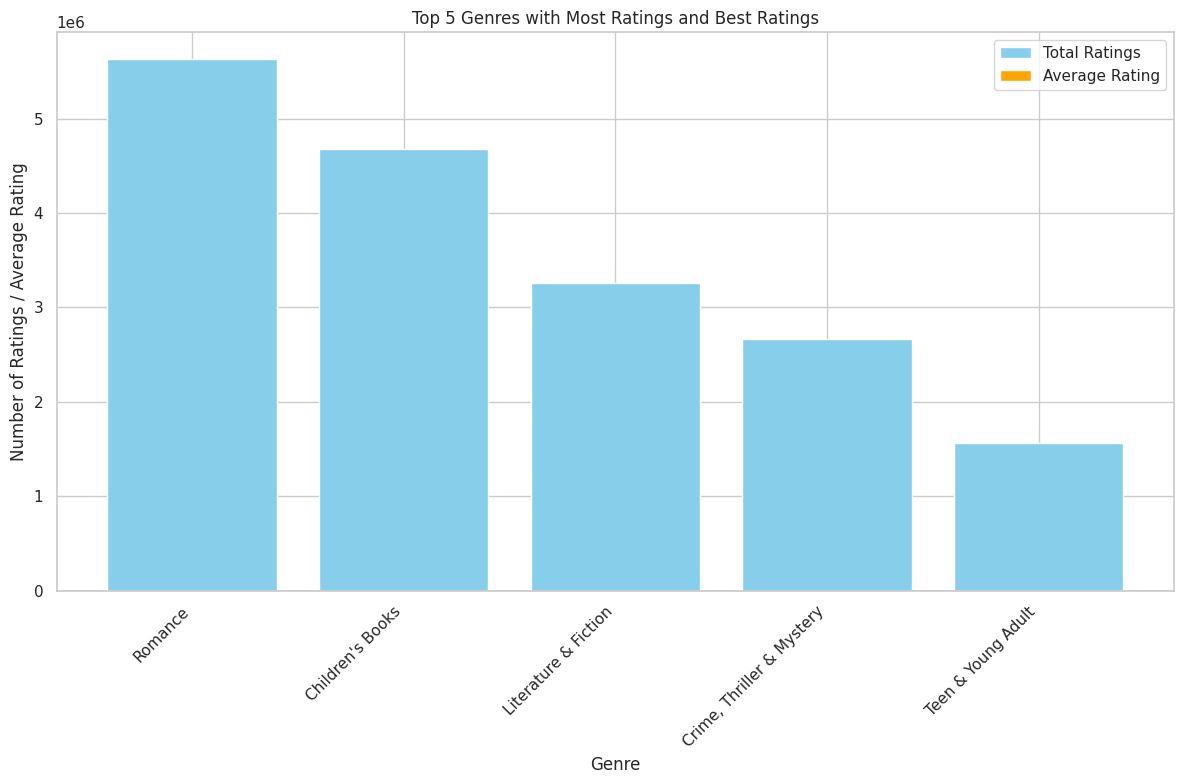

In [25]:
# Group by genre and calculate total number of ratings and average rating for each genre
genre_ratings = books_df.groupby('Main Genre').agg({'No. of People rated': 'sum', 'Rating': 'mean'}).reset_index()

# Sort the genres by total number of ratings and average rating in descending order
top_genres_ratings = genre_ratings.sort_values(by=['No. of People rated', 'Rating'], ascending=False).head(5)

# Plotting the graph
plt.figure(figsize=(12, 8))
plt.bar(top_genres_ratings['Main Genre'], top_genres_ratings['No. of People rated'], color='skyblue', label='Total Ratings')
plt.bar(top_genres_ratings['Main Genre'], top_genres_ratings['Rating'], color='orange', label='Average Rating')
plt.xlabel('Genre')
plt.ylabel('Number of Ratings / Average Rating')
plt.title('Top 5 Genres with Most Ratings and Best Ratings')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

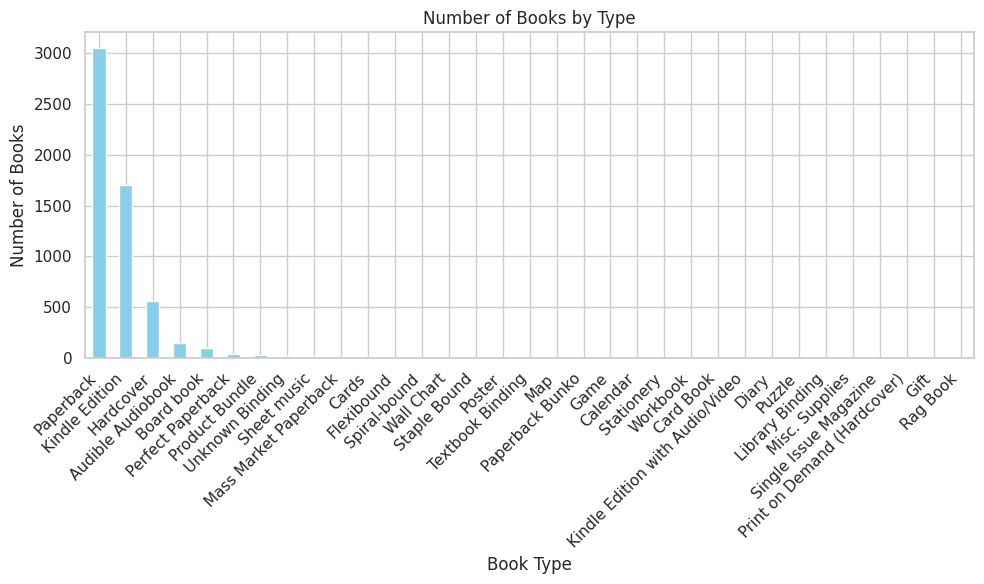

In [26]:
import matplotlib.pyplot as plt

# Count the number of books in each type
type_counts = books_df['Type'].value_counts()

# Sort the counts in descending order
type_counts_sorted = type_counts.sort_values(ascending=False)

# Plot the bar graph
plt.figure(figsize=(10, 6))
type_counts_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Book Type')
plt.ylabel('Number of Books')
plt.title('Number of Books by Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [27]:
# Calculate the combined score
books_df['Combined Score'] = books_df['Rating'] * books_df['No. of People rated']

# Display the DataFrame with the combined score
print(books_df)

                                                  Title                Author  \
0                 the complete novel of sherlock holmes    Arthur Conan Doyle   
1     black holes (l) : the reith lectures [paperbac...       Stephen Hawking   
2                                       the kite runner       Khaled Hosseini   
3     greenlights: raucous stories and outlaw wisdom...   Matthew McConaughey   
4     the science of storytelling: why stories make ...            Will Storr   
...                                                 ...                   ...   
7923  insight guides poland (travel guide with free ...  Insight Travel Guide   
7924              lonely planet india 19 (travel guide)     Anirban Mahapatra   
7925  eyewitness travel phrase book french (ew trave...                    DK   
7926             lonely planet australia (travel guide)           Andrew Bain   
7927  political map of india latest map of india wit...    Wonder House Books   

                    Main Ge

In [28]:
# Group the DataFrame by the "Author" column and calculate the sum of the combined scores
top_authors = books_df.groupby('Author')['Combined Score'].sum().reset_index()

# Sort the authors by their combined scores in descending order
top_authors = top_authors.sort_values(by='Combined Score', ascending=False)

# Print the top authors
print("Top Authors with the Best Combined Score:")
print(top_authors.head(10))

Top Authors with the Best Combined Score:
                 Author  Combined Score
1442       J.K. Rowling       6088777.0
709      Colleen Hoover       5097493.7
2988      Sarah J. Maas       4662102.6
153    Alex Michaelides       2724826.7
1259      George Orwell       2614449.7
1184    Freida McFadden       2356929.5
872         Delia Owens       2250535.5
1182    Fredrik Backman       2213063.6
1527        Jeff Kinney       2204719.2
3581  Yuval Noah Harari       2133307.9


/tmp/ipykernel_33/3544626236.py:22: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


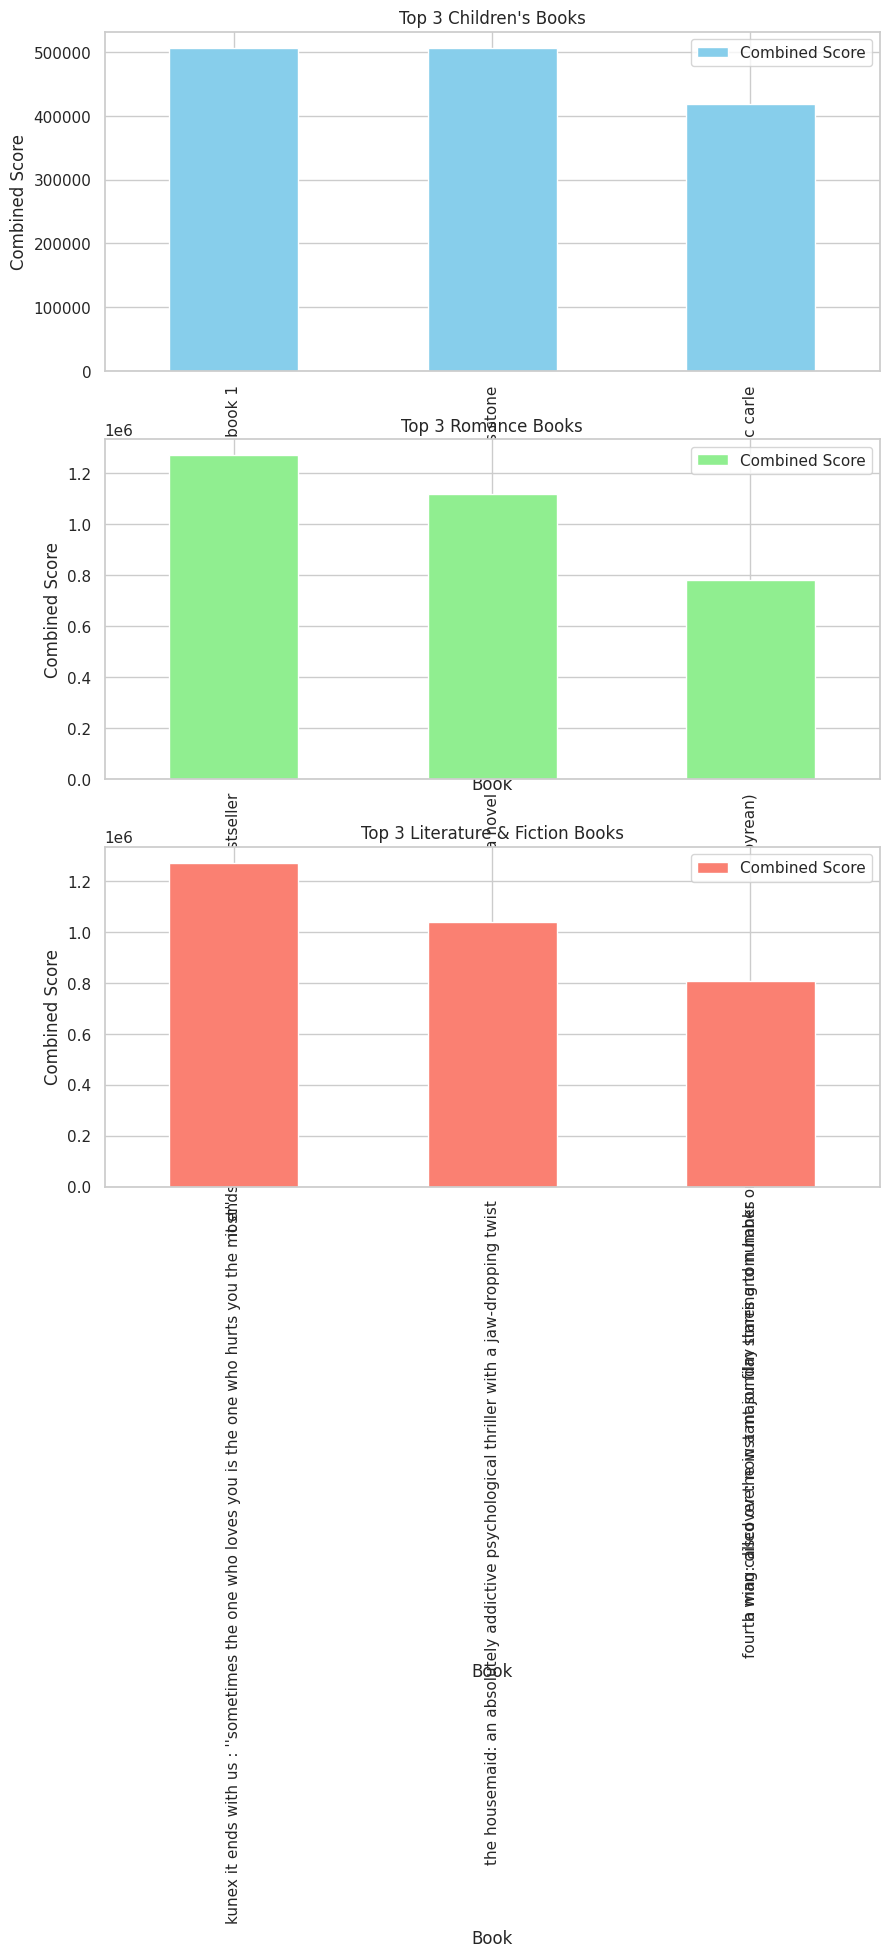

In [31]:
# Plotting the top 3 books from each genre
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10, 15))

# Plot for Children's Books
childrens_books_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[0], color='skyblue')
axes[0].set_title("Top 3 Children's Books")
axes[0].set_xlabel('Book')
axes[0].set_ylabel('Combined Score')

# Plot for Romance Books
romance_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[1], color='lightgreen')
axes[1].set_title("Top 3 Romance Books")
axes[1].set_xlabel('Book')
axes[1].set_ylabel('Combined Score')

# Plot for Literature & Fiction Books
literature_fiction_top3.plot(kind='bar', x='Title', y='Combined Score', ax=axes[2], color='salmon')
axes[2].set_title("Top 3 Literature & Fiction Books")
axes[2].set_xlabel('Book')
axes[2].set_ylabel('Combined Score')

plt.tight_layout()
plt.show()

Ok so now we have the top 3 with their combined score of highest ratings and highest amount of ratings:

Top genres and their top books:
- Romance:
1. It ends with us
2. Reminders of him
3. Fourth wing
- Children's books:
1. Harry Potter and the philosopher's stone
2. The very hungry caterpillar
3. Harry Potter and the deathly hallows
- Literature & Fiction:
1. The housemaid
2. A man called Ove
3. A court of thorns and roses

## Adding "Author Nationality" column
I've now got an idea of the top overall genres, books and authors. But now I'm curious about Indian authors and books written by Indian authors. So, I used ChatGPT to find the nationality of the authors by checking their Wikipedia pages. I then ran through it myself to check for errors, and downloaded it into a csv file. Now, I'll connect it to our database so we can find the top Indian authors and the top books written by Indian authors.

In [35]:
import pandas as pd

# Read the CSV file into a DataFrame
author_nationality_df = pd.read_csv('/kaggle/input/author-nationalities-amazonbookdf/author_nationalities.csv')

# Split the "Author" column based on the comma separator
author_nationality_df[['Author', 'Author Nationality']] = author_nationality_df['Arthur Conan Doyle, United Kingdom'].str.split(',', n=1, expand=True)

# Drop the original "Arthur Conan Doyle, United Kingdom" column
author_nationality_df.drop(columns=['Arthur Conan Doyle, United Kingdom'], inplace=True)

# Print the resulting DataFrame
print(author_nationality_df.head())

                Author Author Nationality
0      Stephen Hawking     United Kingdom
1      Khaled Hosseini      United States
2  Matthew McConaughey      United States
3           Will Storr     United Kingdom
4         J.K. Rowling     United Kingdom


In [36]:
# Merge author nationality information into books_df
books_with_nationality_df = pd.merge(books_df, author_nationality_df, on='Author', how='left')

# Print the head of the merged DataFrame
print(books_with_nationality_df.head())

                                               Title               Author  \
0              the complete novel of sherlock holmes   Arthur Conan Doyle   
1  black holes (l) : the reith lectures [paperbac...      Stephen Hawking   
2                                    the kite runner      Khaled Hosseini   
3  greenlights: raucous stories and outlaw wisdom...  Matthew McConaughey   
4  the science of storytelling: why stories make ...           Will Storr   

                 Main Genre           Sub Genre            Type  Rating  \
0  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.4   
1  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   
2  Arts, Film & Photography  Cinema & Broadcast  Kindle Edition     4.6   
3  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.6   
4  Arts, Film & Photography  Cinema & Broadcast       Paperback     4.5   

   No. of People rated  Price_USD  Combined Score Author Nationality  
0              

In [37]:
# Filter authors from India
authors_from_india = books_with_nationality_df[books_with_nationality_df['Author Nationality'] == ' India']

# Count occurrences of each author
top_authors_from_india = authors_from_india['Author'].value_counts().head(10)

# Print the top 10 authors from India
print("Top 10 Authors from India:")
print(top_authors_from_india)

Top 10 Authors from India:
Author
Sudha Murty                              17
Arihant Experts                          16
NCERT                                    15
Acharya Prashant                         14
Ruskin Bond                              11
Paramahansa Yogananda                     9
Ashish Arora                              8
Jim Corbett                               8
Anant Pai                                 8
Indian Institute of Banking & Finance     7
Name: count, dtype: int64


In [38]:
# Filter books by Indian authors
books_by_indian_authors = books_with_nationality_df[books_with_nationality_df['Author Nationality'] == ' India']

# Sort the filtered DataFrame by rating (or any other criteria)
top_books_by_indian_authors = books_by_indian_authors.sort_values(by='Rating', ascending=False).head(10)

# Print the top 10 books by Indian authors
print("Top 10 Books by Indian Authors:")
print(top_books_by_indian_authors[['Title', 'Author', 'Rating', 'No. of People rated', 'Combined Score']])

Top 10 Books by Indian Authors:
                                                  Title  \
177   one sting attached (hindi)/ishq baki/इश्क़ बाक...   
2606  nism x taxmann's investment adviser combo – le...   
1645  tally prime workbook (inenglishi) a real pract...   
4914                        मन/ man by acharya prashant   
378          own your body: a doctor's life-saving tips   
266     snakes, drugs and rock 'n' roll: my early years   
4885                     समय/ samay by acharya prashant   
970               a history of south india for children   
1544   data communication and networking by sushil goel   
3180        the watershed year: which way will india go   

                                        Author  Rating  No. of People rated  \
177                     Pankaj Dubey/पंकज दुबे     5.0                  1.0   
2606  NISM (An Educational Initiative of SEBI)     5.0                  1.0   
1645                            RAKESH SANGWAN     5.0                  1.0   
49

# Data Visualization Infographic
Now that I've done a quick EDA, I will create two dashboards with key elements. This would be useful for stakeholders without a data background that want something easy-to-read, concise, and visual.

(sorry for the bad quality — Kaggle kernels, you know)


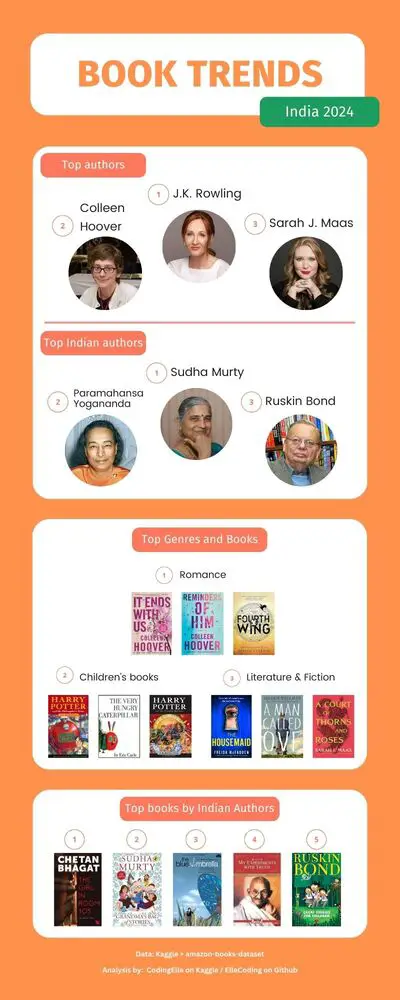
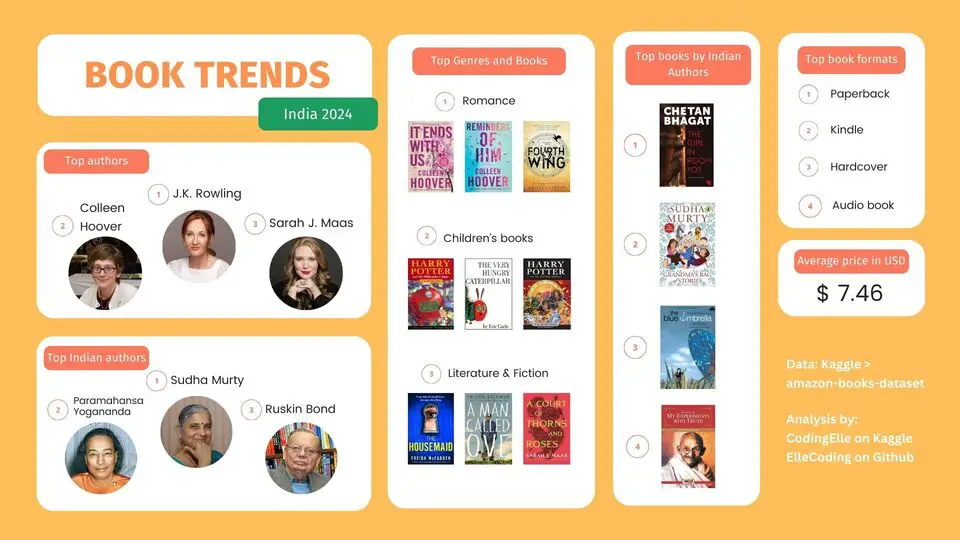

# Tableau Dashboard
Although the previous dashboards can be great, as mentioned, to translate the data to stakeholders without a data background, an interactive dashboard is vital when working with ongoing data, and better for stakeholders with more data literacy that would also like to see the data evolve and play around with the filters for further data exploring. So now, I'll download the data and create a dashboard on Tableau. Let's gooo :D

In [39]:
# Download csv file
books_df.to_csv('books_data.csv', index=False)

# Download csv file
books_with_nationality_df.to_csv('books_with_nationality_df.csv', index=False)

Here are some screenshots of the Tableau dashboard :) simple, but it does the trick!

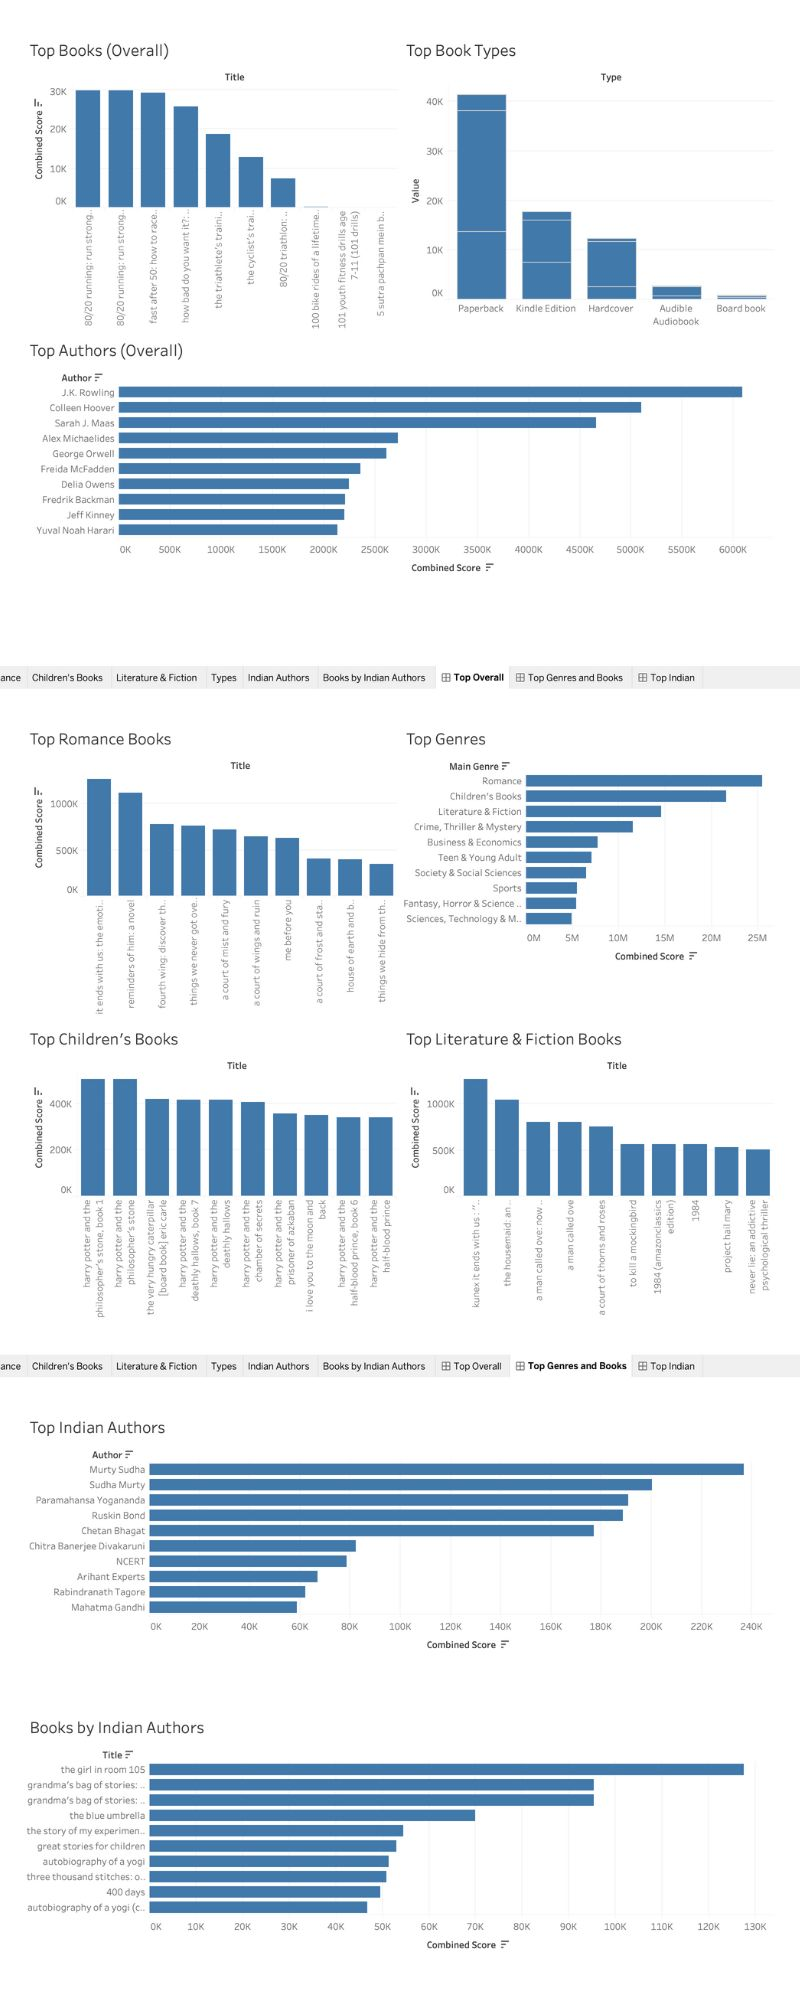

Thanks for tuning in. Happy coding!